In [2]:
import pandas as pd
import numpy as np

#Load the dataset
df = pd.read_csv('Predict_Hair_Fall.csv')

In [3]:
print("Shape:", df.shape)

Shape: (999, 13)


In [4]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB
None


In [5]:
print("\nHead:")
print(df.head())


Head:
       Id Genetics Hormonal Changes Medical Conditions  \
0  133992      Yes               No            No Data   
1  148393       No               No             Eczema   
2  155074       No               No         Dermatosis   
3  118261      Yes              Yes           Ringworm   
4  111915       No               No          Psoriasis   

  Medications & Treatments Nutritional Deficiencies     Stress  Age  \
0                  No Data      Magnesium deficiency  Moderate   19   
1              Antibiotics      Magnesium deficiency      High   43   
2         Antifungal Cream        Protein deficiency  Moderate   26   
3              Antibiotics        Biotin Deficiency   Moderate   46   
4                 Accutane           Iron deficiency  Moderate   30   

  Poor Hair Care Habits  Environmental Factors Smoking Weight Loss   Hair Loss  
0                    Yes                   Yes      No           No          0  
1                    Yes                   Yes      No 

In [6]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [7]:
# Check for missing values
df.isnull().sum()

Id                           0
Genetics                     0
Hormonal Changes             0
Medical Conditions           0
Medications & Treatments     0
Nutritional Deficiencies     0
Stress                       0
Age                          0
Poor Hair Care Habits        0
Environmental Factors        0
Smoking                      0
Weight Loss                  0
Hair Loss                    0
dtype: int64

In [8]:
# Drop ID column
df.drop(columns=['Id'], inplace=True)

In [9]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Genetics                   999 non-null    object
 1   Hormonal Changes           999 non-null    object
 2   Medical Conditions         999 non-null    object
 3   Medications & Treatments   999 non-null    object
 4   Nutritional Deficiencies   999 non-null    object
 5   Stress                     999 non-null    object
 6   Age                        999 non-null    int64 
 7   Poor Hair Care Habits      999 non-null    object
 8   Environmental Factors      999 non-null    object
 9   Smoking                    999 non-null    object
 10  Weight Loss                999 non-null    object
 11  Hair Loss                  999 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 93.8+ KB
None


Matplotlib is building the font cache; this may take a moment.


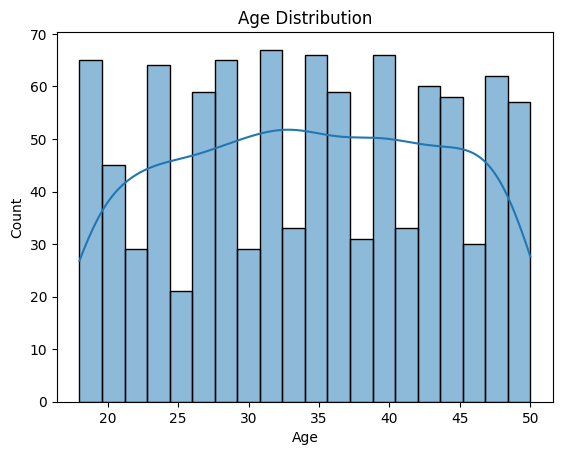

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [14]:
df.columns = df.columns.str.strip()

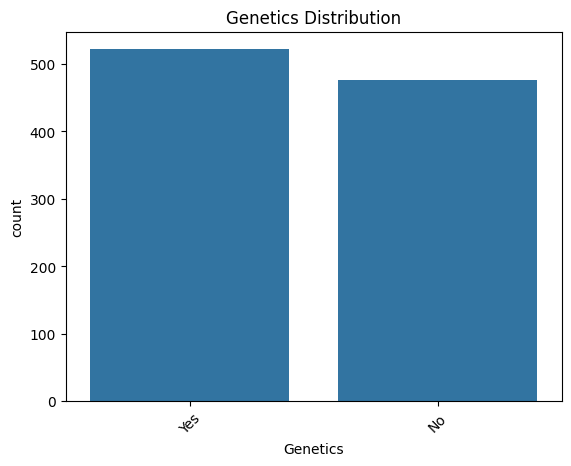

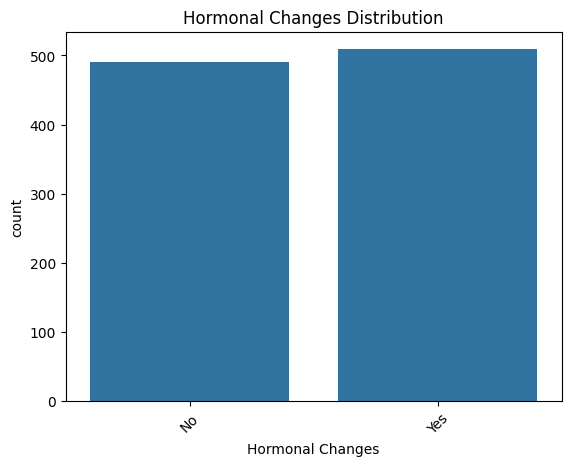

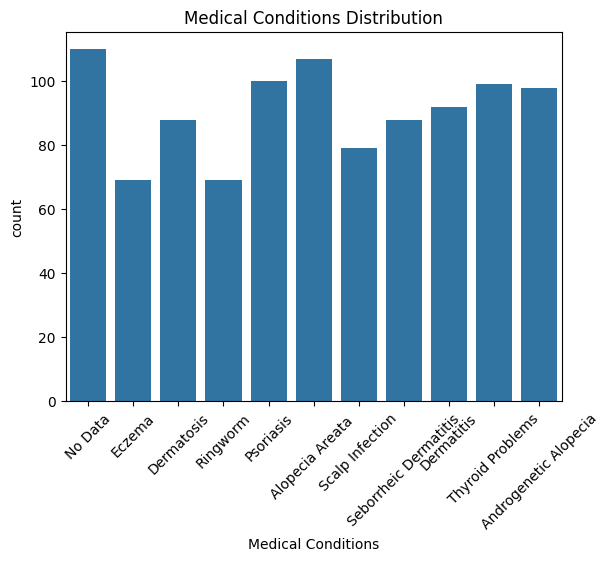

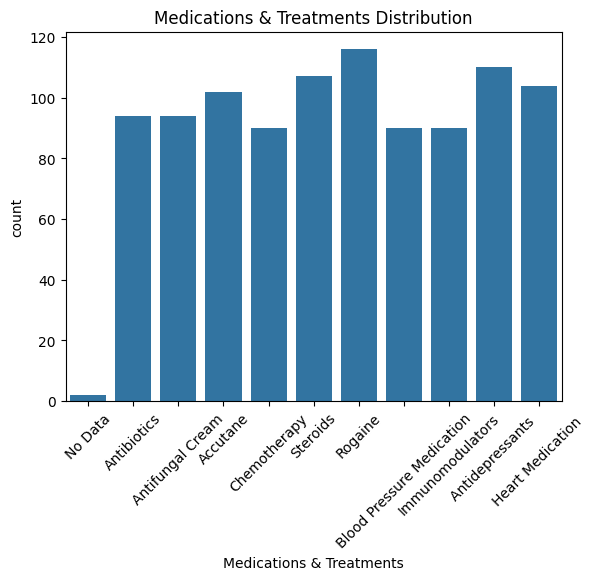

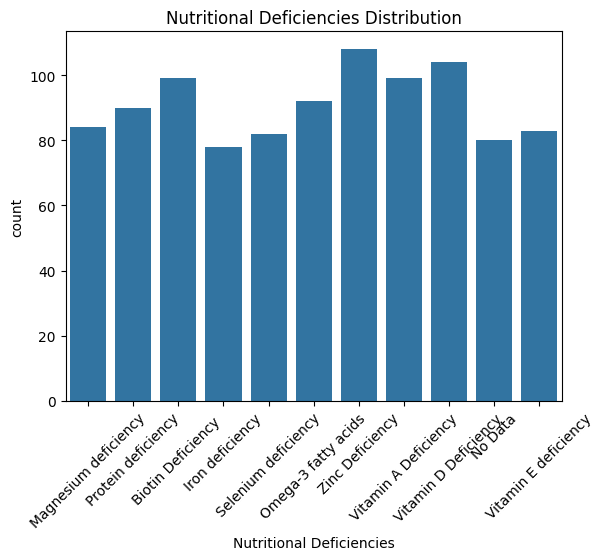

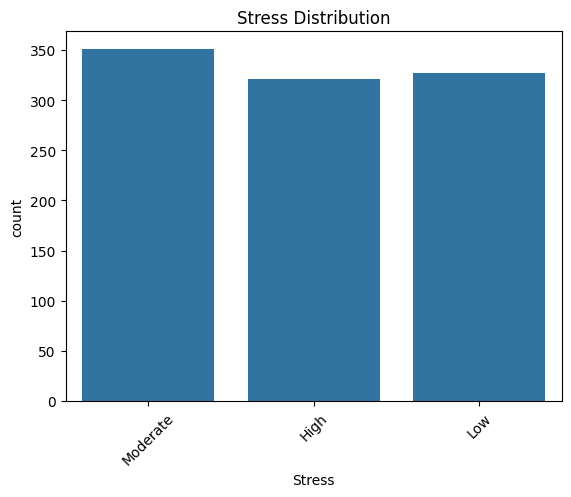

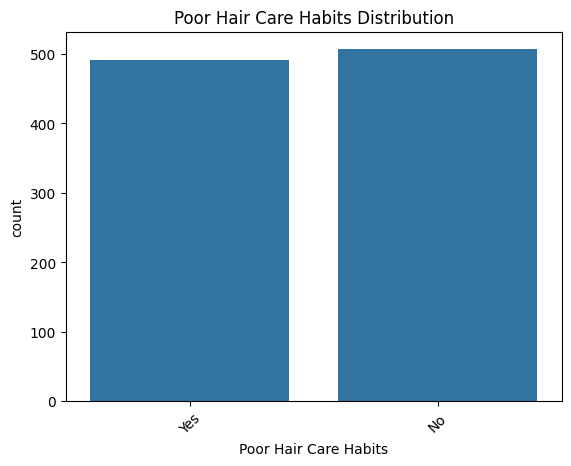

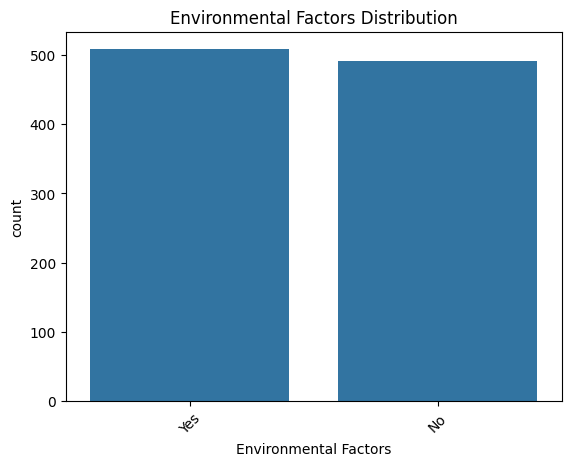

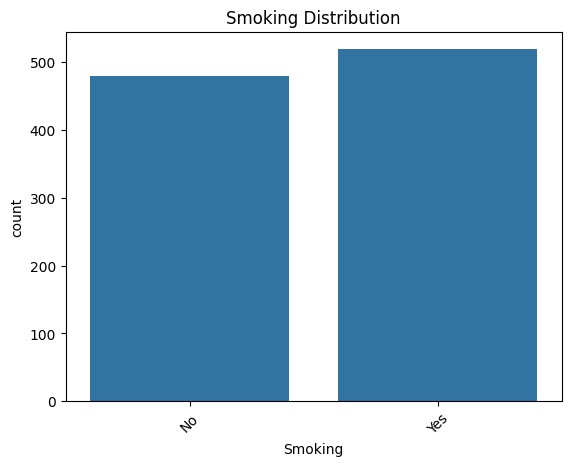

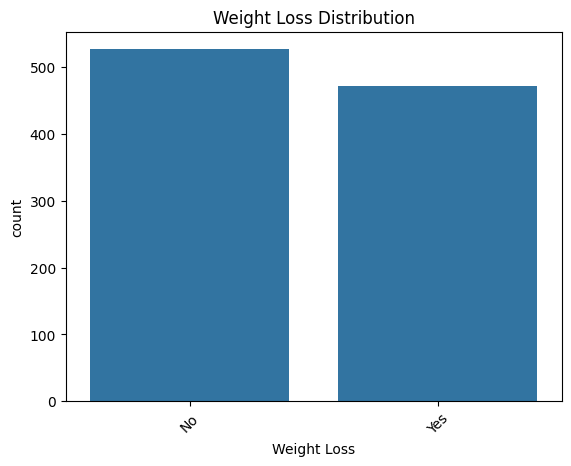

In [15]:
categorical_cols = ['Genetics', 'Hormonal Changes', 'Medical Conditions',
                    'Medications & Treatments', 'Nutritional Deficiencies', 'Stress',
                    'Poor Hair Care Habits', 'Environmental Factors', 'Smoking', 'Weight Loss']

for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()


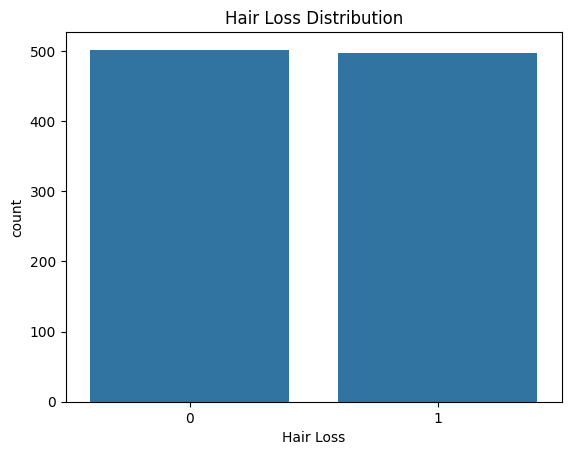

In [16]:
# Hair Loss (Target Variable)
sns.countplot(x='Hair Loss', data=df)
plt.title('Hair Loss Distribution')
plt.show()

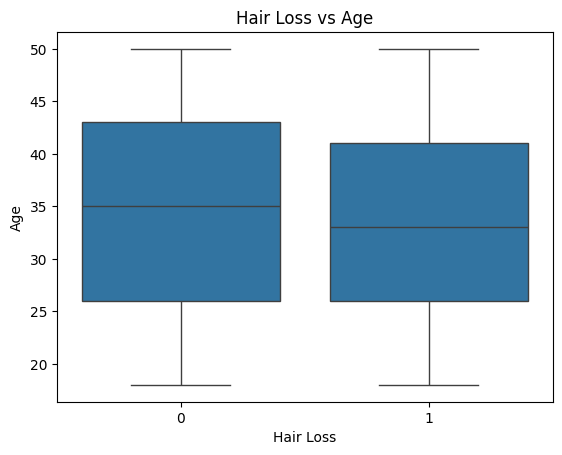

In [17]:
# Hair Loss vs Age
sns.boxplot(x='Hair Loss', y='Age', data=df)
plt.title('Hair Loss vs Age')
plt.show()


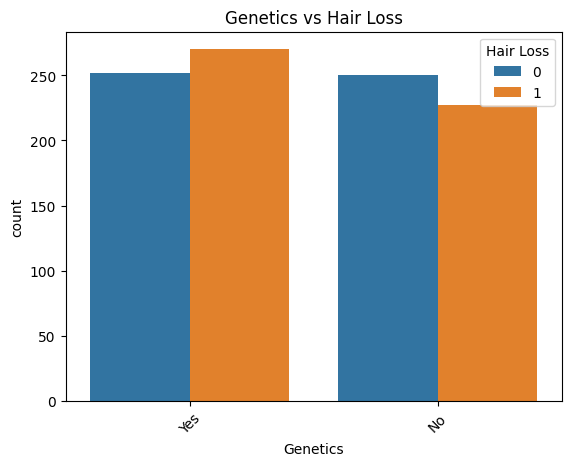

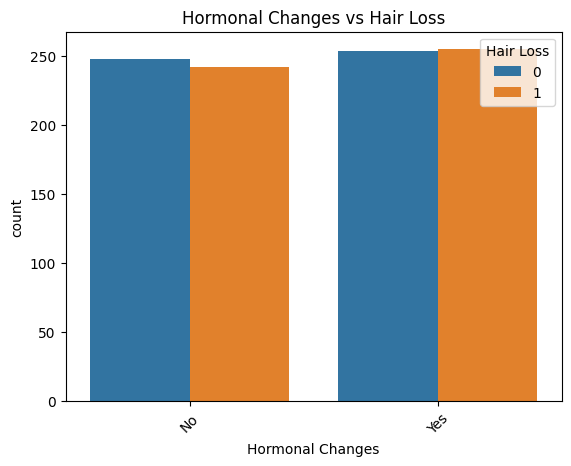

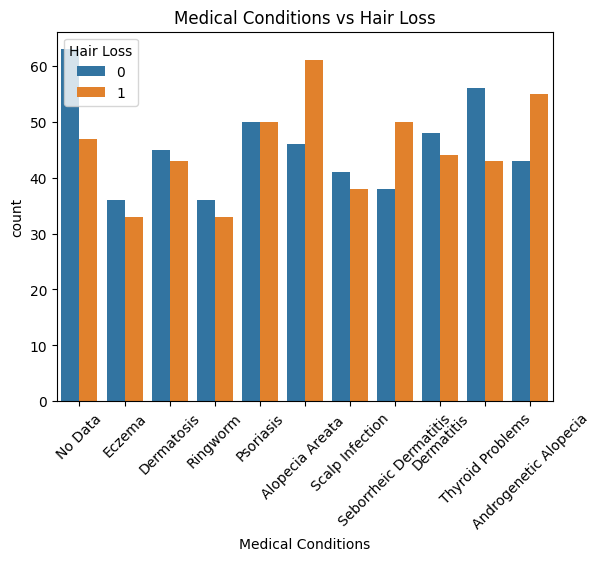

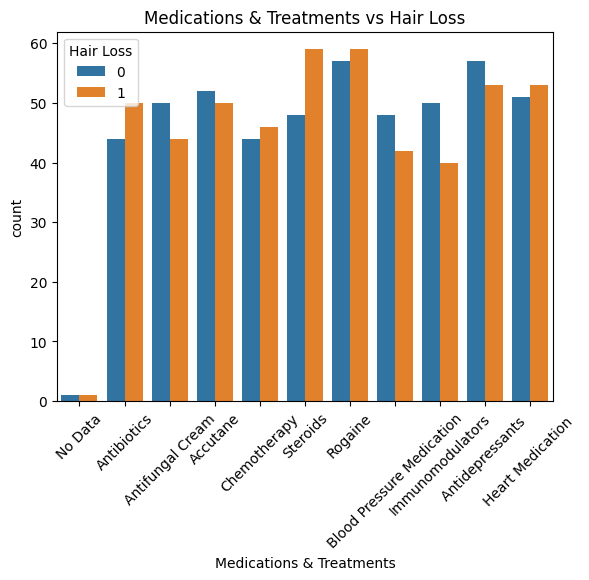

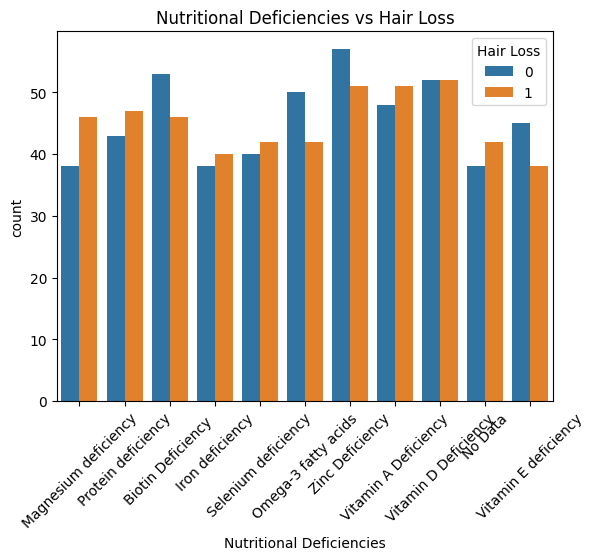

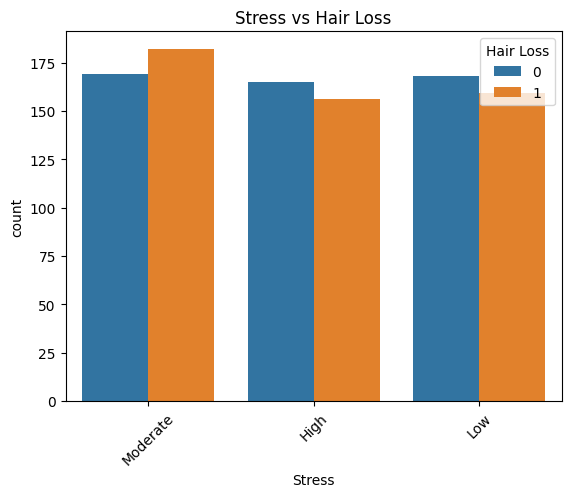

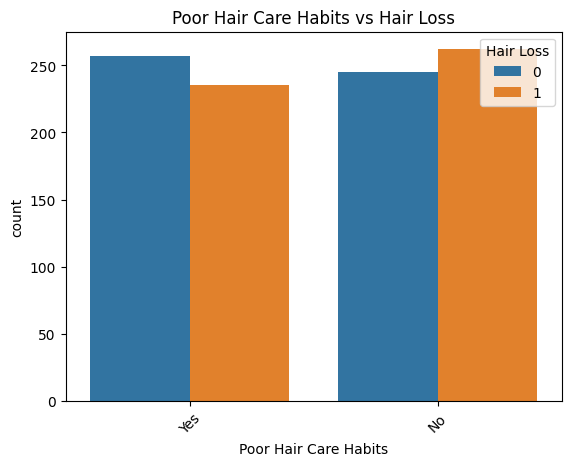

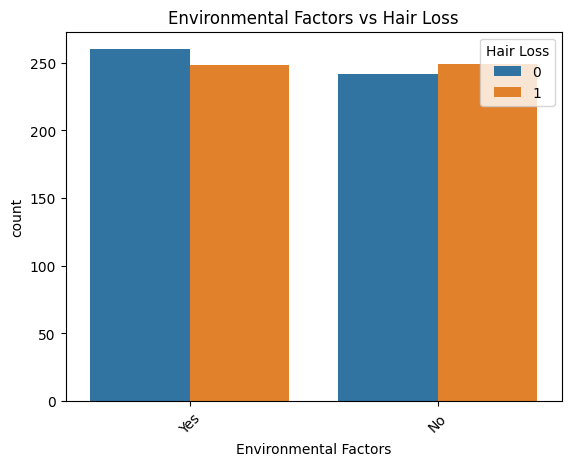

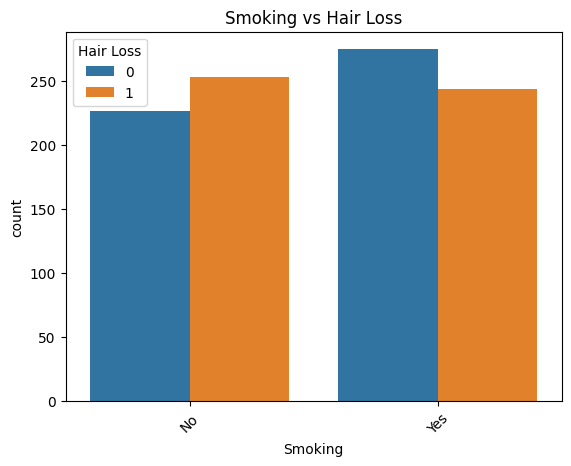

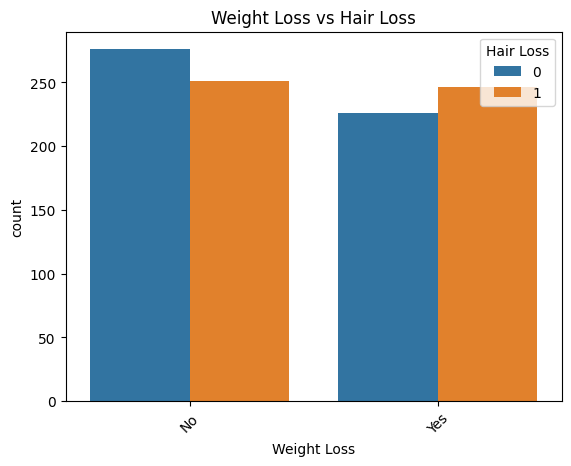

In [ ]:
# Categorical Features vs Hair Loss
for col in categorical_cols:
    sns.countplot(x=col, hue='Hair Loss', data=df)
    plt.title(f'{col} vs Hair Loss')
    plt.xticks(rotation=45)
    plt.show()

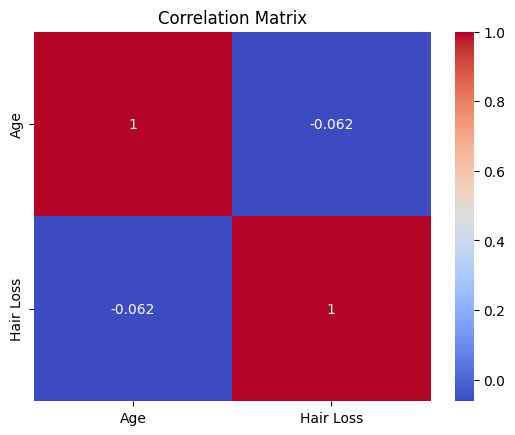

In [ ]:
# Correlation (Numerical only)
numeric_corr = df.corr(numeric_only=True)
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Bin ages into groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 35, 50, 100], 
                         labels=['Teen', 'Young Adult', 'Middle Aged', 'Senior'])
df[['Age', 'Age_Group']].head()


,Age,Age_Group
0,19,Teen
1,43,Middle Aged
2,26,Young Adult
3,46,Middle Aged
4,30,Young Adult


In [21]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Age,Hair Loss,Genetics_Yes,Hormonal Changes_Yes,Medical Conditions_Androgenetic Alopecia,Medical Conditions_Dermatitis,Medical Conditions_Dermatosis,Medical Conditions_Eczema,Medical Conditions_No Data,Medical Conditions_Psoriasis,...,Nutritional Deficiencies_Zinc Deficiency,Stress_Low,Stress_Moderate,Poor Hair Care Habits_Yes,Environmental Factors_Yes,Smoking_Yes,Weight Loss_Yes,Age_Group_Young Adult,Age_Group_Middle Aged,Age_Group_Senior
0,19,0,True,False,False,False,False,False,True,False,...,False,False,True,True,True,False,False,False,False,False
1,43,0,False,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,True,False
2,26,0,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,True,True,False,False
3,46,0,True,True,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,True,False
4,30,1,False,False,False,False,False,False,False,True,...,False,False,True,False,True,True,False,True,False,False


In [22]:
# Combine stress and medical conditions
df['Stress_Medical'] = df['Stress'].astype(str) + "_" + df['Medical Conditions'].astype(str)
df['Stress_Medical'].head()

0       Moderate_No Data
1            High_Eczema
2    Moderate_Dermatosis
3      Moderate_Ringworm
4     Moderate_Psoriasis
Name: Stress_Medical, dtype: object

In [23]:
from sklearn.preprocessing import StandardScaler

# Scale the Age column
scaler = StandardScaler()
df_encoded['Age'] = scaler.fit_transform(df_encoded[['Age']])
df_encoded[['Age']].head()

,Age
0,-1.620370
1,0.940099
2,-0.873567
3,1.260157
4,-0.446822
